In [2]:
import matplotlib.pyplot as plt
from mvcl.primitives import *
from rinarak.knowledge.executor import CentralExecutor
from mvcl.model import MetaVisualLearner
from mvcl.config import config
from datasets.tdw_dataset import TDWRoomDataset
from mvcl.percept.metanet import weighted_softmax
local = not torch.cuda.is_available()
syq_path = "/Users/melkor/Documents/datasets"
wys_path = "/data3/guofang/Meta/Benchmark/MultiPaperQA/wys_try/datasets"
dataset_dir = syq_path if local else wys_path

In [5]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from rinarak.utils.os import load_json

local = True
dataset_dir = "/Users/melkor/Documents/datasets" if local else "datasets"

def normal_img(img):
    if len(img.shape) == 4:
        if not img.shape[1] in [1,3,4]: return img.permute(0,3,1,2)
    if len(img.shape) == 3:
        if not img.shape[0] in [1,3,4]: return img.permute(2,0,1)

def identiy_masks(img):
    return

class TDWRoomDataset(Dataset):
    def __init__(self,name="TDWRoom", split = "train", resolution = (128,128), root_dir = "datasets"):
        super().__init__()
        self.split = split
        self.root_dir = root_dir + f"/{name}"

        img_data_path = root_dir + f"/{name}"+ f"/{split}/img"
        self.files = os.listdir(img_data_path)

        """ add a working resolution to adapt different scenes and parameters"""
        self.transform = transforms.Resize(resolution)
    
    def __len__(self):
        return 700#len(self.files) // 4
    
    def __getitem__(self, idx):
        root_dir = self.root_dir
        split = self.split
        img_data_path = root_dir + f"/{self.split}/img"

        scene_data_path = root_dir + f"/{self.split}/scene/{idx}.json"
        scene_setup = load_json(scene_data_path)
        print(scene_setup)

        data = {}
        img = torch.tensor(plt.imread(img_data_path + f"/img_{idx}.png"))
        albedo = torch.tensor(plt.imread(img_data_path + f"/albedo_{idx}.png"))
        #id_map = torch.tensor(plt.imread())
        masks = np.load(img_data_path + f"/mask_{idx}.npy")
        #masks = torch.tensor(plt.imread(img_data_path + f"/id_{split}_{idx}.png"))
        

        data["img"] = self.transform(normal_img(img))
        data["albedo"] = self.transform(normal_img(albedo))
        data["masks"] =self.transform(torch.tensor(masks).unsqueeze(0)).squeeze(0)
        return data

In [ ]:
operator_greater_pair = Primitive(
    "greater_pair", arrow(ObjectSet, ObjectSet, Boolean, Boolean),
    lambda x: lambda y: lambda z: {uniform_pair_compare_to_zero(x["context"]["indices"],x["context"]["affinity"][z],x["end"], y["end"], "greater")}
)
operator_greater_pair = Primitive(
    "lesser_pair", arrow(ObjectSet, ObjectSet, Boolean, Boolean),
    lambda x: lambda y: lambda z: {uniform_pair_compare_to_zero(x["context"]["indices"],x["context"]["affinity"][z],x["end"], y["end"], "lesser")}
)

uniform_greater_pair = Primitive(
    "uniform", arrow(ObjectSet, Boolean, Boolean),
    lambda x: lambda y:  {**x,"end":uniform_pair_compare_to_zero(x["context"]["indices"],x["context"]["affinity"][y],x["end"], x["end"], "greater")}
)


operator_scene_cast = Primitive("mask",
                                arrow(ObjectSet, Concept, ObjectSet),
                                lambda x: lambda y: {**x,"end":x["context"]["masks"][y]})

operator_affinity_cast = Primitive("affinity",
                                   arrow(ObjectSet, Concept, ObjectSet),
                                   lambda x: lambda y: {**x,"end": x["context"]["affinity"][y]})

operator_set_union = Primitive(
    "union", arrow(ObjectSet, ObjectSet, ObjectSet),
    lambda x: lambda y: {**x,"end":torch.max(x["end"],y["end"])}
)

operator_set_union = Primitive(
    "intersect", arrow(ObjectSet, ObjectSet, ObjectSet),
    lambda x: lambda y: {**x,"end":torch.min(x["end"],y["end"])}
)
print(Primitive.GLOBALS)

Primitive("albedo", arrow(Concept), "albedo")
Primitive("texture", arrow(Concept), "texture")
Primitive("movable", arrow(Concept),"spelke")
Primitive("moving", arrow(Concept), "moving")
Primitive("object", arrow(Concept), "object")

{'9569933': {'model': 'b05_table_new', 'position': {'x': 0, 'y': 0, 'z': 0}, 'rotation': {'x': 0, 'y': 90, 'z': 0}}, '2': {'model': 'chair_thonet_marshall', 'position': {'x': 0.8, 'y': 0, 'z': 0}, 'rotation': {'x': 0, 'y': 270, 'z': 0}}, '3': {'model': 'chair_thonet_marshall', 'position': {'x': -0.7000000000000001, 'y': 0, 'z': 0.0}, 'rotation': {'x': 0, 'y': 90, 'z': 0}}, '4': {'model': 'chair_thonet_marshall', 'position': {'x': 0.0, 'y': 0, 'z': 1.0}, 'rotation': {'x': 0, 'y': 180, 'z': 0}}, '5': {'model': 'chair_thonet_marshall', 'position': {'x': 0, 'y': 0, 'z': -1}, 'rotation': {'x': 0, 'y': 0, 'z': 0}}, '11': {'model': 'vase_05', 'position': {'x': 0.2, 'y': 1, 'z': -0.1}, 'rotation': {'x': 0, 'y': 0, 'z': 0}}, '12': {'model': 'orange', 'position': {'x': -0.10000000000000003, 'y': 1, 'z': -0.09999999999999998}, 'rotation': {'x': 0, 'y': 0, 'z': 0}}, '13': {'model': 'spoon1', 'position': {'x': 0.1, 'y': 1, 'z': -0.1}, 'rotation': {'x': 0, 'y': 0, 'z': 0}}, '14': {'model': 'knife1',

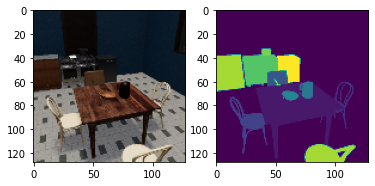

In [6]:
resolution = (128,128)
W, H = resolution
config.resolution = resolution
B, N = 1, W * H

name = "TDWKitchen"
dataset = TDWRoomDataset(name,resolution = resolution, root_dir = dataset_dir, split = "train")
loader = torch.utils.data.DataLoader(dataset, batch_size = B, shuffle = True)
for sample in loader:break;
"""load the dataset and make the ideal images and masks"""

ims = sample["img"]
target_masks = sample["masks"]
masks = target_masks
plt.subplot(121)
plt.imshow(ims[0].permute(1,2,0))
plt.subplot(122)
plt.imshow(target_masks[0])
plt.show()

In [9]:
import numpy as np
import math
num_edges = 100

def visualize_affinities(indices, affinity, im = None, num_edges = 10):
    _, B, N, K = indices.shape
    W = int(math.sqrt(N))
    indices = indices.reshape([3, B, N * K])
    rand_idx = np.random.randint(0,N * K, [num_edges])
    rand_idx = torch.tensor(rand_idx).int()
    aff = affinity.reshape(B, N * K)
    if im is None: im = torch.zeros([B,3, N])
    plt.subplot(121)
    plt.imshow(im.reshape([B,3,W,W])[0].permute(1,2,0))
    for idx in rand_idx:
        u_idx = indices[1,0,idx]
        v_idx = indices[2,0,idx]
        ux, uy = u_idx // W, u_idx % W
        vx, vy = v_idx // W, v_idx % W
        color = "green" if aff[0,idx] > 0.0 else "red"
        plt.plot([uy,vy],[ux,vx], c = color)
    plt.subplot(122)
    plt.imshow(im.reshape([B,3,W,W])[0].permute(1,2,0))

In [10]:
import torch.nn.functional as F
def uniform_pair_compare_to_zero(indices, affinity, mask1, mask2, mode = "greater"):
    """
    all inputs are logits: implication statement: forall i,j \in M1,M2, affinity i,j = 1
    """
    gc = 0.5
    tc = 2.0
    eps = 0.01
    _, B, N, K = indices.shape

    if len(mask1.shape) == 3:
        mask1 = torch.max(mask1, dim = -1).values
    if len(mask2.shape) == 3:
        mask2 = torch.max(mask2, dim = -1).values
    #print(mask1.shape, mask1.max(), mask1.min())
    #print(mask2.shape, mask2.max(), mask2.min())

    filter_u = indices[1, ...].reshape(B, N * K)
    filter_v = indices[2, ...].reshape(B, N * K)

    u_mask = torch.gather(mask1, dim = 1, index = filter_u)
    v_mask = torch.gather(mask2, dim = 1, index = filter_v)
    edge_mask = u_mask * v_mask
    
    
    #print("AffTensor",affinity, affinity.max(), affinity.min())

    aff = affinity.reshape(B, N * K).clamp(-20,20.)
    

    assert mode in ["greater", "lesser"]
    if mode == "greater": aff = aff
    if mode == "lesser": aff = -1. * aff

    probability_tensor = torch.sigmoid(
        aff / tc
    )
    #print(probability_tensor.max(), probability_tensor.min())
    #print("EdgeMask",edge_mask)
    #print("ProbTensor",probability_tensor, probability_tensor.max(), probability_tensor.min())
    
    #probability_tensor = aff

    probability_tensor = edge_mask * probability_tensor + \
     (1-edge_mask) * 1.0

    
    probability_log = torch.log(probability_tensor.clamp(eps, 1 - eps))
   
    forall_quantized = torch.sum(probability_log)

    return forall_quantized

In [13]:
from rinarak.domain import load_domain_string, Domain
domain_parser = Domain("mvcl/base.grammar")

meta_domain_str = ""
with open(f"domains/demo_domain.txt","r") as domain:
    for line in domain: meta_domain_str += line
domain = load_domain_string(meta_domain_str, domain_parser)

In [14]:
model = MetaVisualLearner(domain, config)
#model.add_affinities(["albedo"])
M = 30
model.add_affinities(["spelke"])
model.load_state_dict(torch.load("checkpoints/concept_expr_prox128.ckpt", map_location="cpu"))
model.grouper.competition.M = M
model.grouper.num_long_range = 0

In [15]:
percept_outputs = model.calculate_object_affinity(ims, working_resolution = (W, H), verbose = False)
sample_aff = percept_outputs["affinity"].clamp(-20,20.)
sample_inds = percept_outputs["indices"]

tensor(-5092.4175, grad_fn=<SumBackward0>)


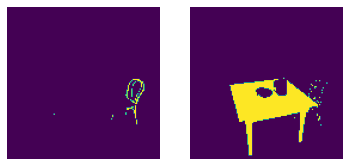

In [18]:
mask1 = (masks == 2).float().reshape([B,N])
mask2 = (masks == 1).float().reshape([B,N])

logp = uniform_pair_compare_to_zero(sample_inds, sample_aff, mask1, mask2)

print(logp)

plt.subplot(121)
plt.axis("off")
plt.imshow(mask1[0].reshape([128,128]))
plt.subplot(122)
plt.axis("off")
plt.imshow(mask2[0].reshape([128,128]))


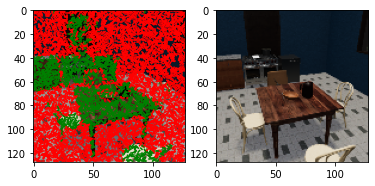

In [19]:
im = sample["img"].reshape([B, 3, W * H])
visualize_affinities(sample_inds, sample_aff, im, 6000)

In [20]:
import sys
epochs = 100
optim = torch.optim.Adam(model.parameters(), lr = 2e-4)
for epoch in range(epochs):
    percept_outputs = model.calculate_object_affinity(ims, working_resolution = (W, H), verbose = False)
    sample_aff = percept_outputs["affinity"].clamp(-20,20.)
    sample_inds = percept_outputs["indices"]

    logp = uniform_pair_compare_to_zero(sample_inds, sample_aff, mask1, mask2)

    loss = -1. * logp
    optim.zero_grad()
    loss.backward()
    optim.step()
    sys.stdout.write(f"\repoch{epoch+1} loss:{loss.detach().numpy()}")


epoch100 loss:4116.61376953125

In [ ]:
visualize_affinities(sample_inds, sample_aff, im, 6000)